In [19]:
#QESTION 3
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#path
file_path = '/Users/prakashmaddirala/project-one/employee_data/employee_data.csv'
data = pd.read_csv(file_path)


#data grouping 
gender_rating = data[['GenderCode','Current Employee Rating']]
gender_rating_stats = gender_rating.groupby(['GenderCode', 'Current Employee Rating']).size()
print(gender_rating_stats)
#missing data
print(gender_rating["GenderCode"].isnull().sum())
print(gender_rating["Current Employee Rating"].isnull().sum())
#average rating
average_rating = gender_rating.groupby('GenderCode')['Current Employee Rating'].mean()
print(average_rating)
#DF
gender_rating_df = gender_rating_stats.unstack(fill_value=0)
#rating percentages
gender_rating_percentages = gender_rating_df.div(gender_rating_df.sum(axis=1), axis=0) * 100
print(gender_rating_percentages)




GenderCode  Current Employee Rating
Female      1                          133
            2                          248
            3                          953
            4                          207
            5                          141
Male        1                          138
            2                          262
            3                          577
            4                          212
            5                          129
dtype: int64
0
0
GenderCode
Female    2.985137
Male      2.948407
Name: Current Employee Rating, dtype: float64
Current Employee Rating          1          2          3          4         5
GenderCode                                                                   
Female                    7.907253  14.744352  56.658740  12.306778  8.382878
Male                     10.470410  19.878604  43.778452  16.084977  9.787557


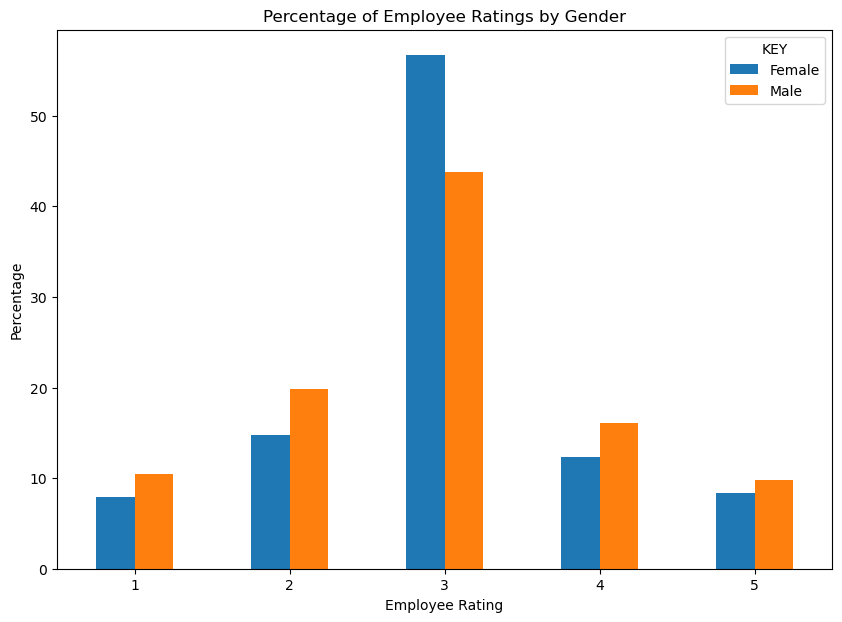

In [14]:
#plot
fig, ax = plt.subplots(figsize=(10, 7))
gender_rating_percentages.T.plot(kind='bar', ax=ax) 
# Update labels
ax.set_title('Percentage of Employee Ratings by Gender')
ax.set_xlabel('Employee Rating')
ax.set_ylabel('Percentage')
ax.legend(title='KEY', labels=['Female', 'Male'])  

plt.xticks(rotation=0) 
plt.show()

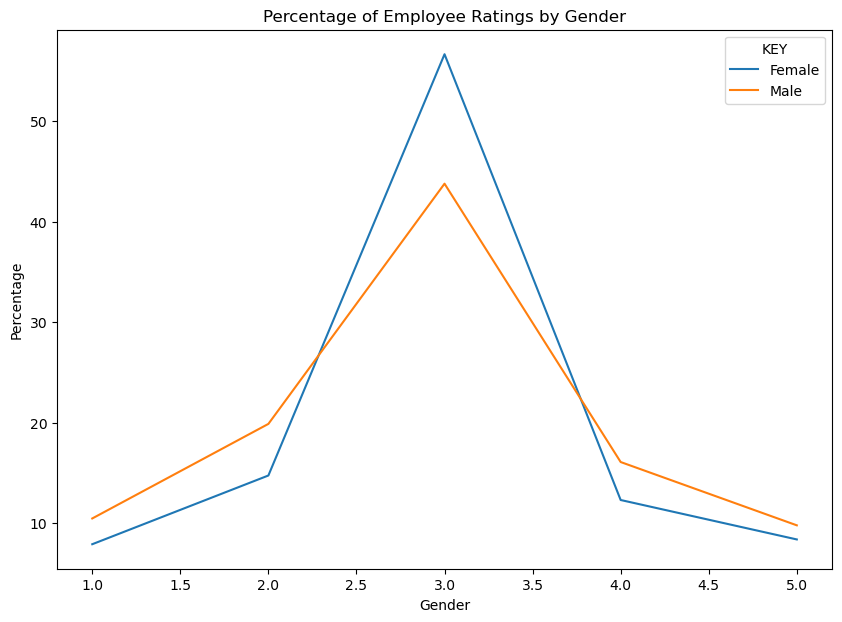

In [18]:
#plot
fig, ax = plt.subplots(figsize=(10, 7))
gender_rating_percentages.T.plot(kind='line', ax=ax) 
# Update labels
ax.set_title('Percentage of Employee Ratings by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.legend(title='KEY', labels=['Female', 'Male'])  

plt.xticks(rotation=0) 
plt.show()

In [34]:
#QUESTION 4
#libraries 
import pandas as pd
import matplotlib.pyplot as plt


#path
file_path = '/Users/prakashmaddirala/project-one/employee_data/employee_data.csv'
data = pd.read_csv(file_path)

type_performance = data[['EmployeeType','Performance Score']]
type_performance_stats = type_performance.groupby(['EmployeeType', 'Performance Score']).size()
type_performance_stats = type_performance_stats.unstack(level=0, fill_value=0)
print(type_performance_stats)



EmployeeType       Contract  Full-Time  Part-Time
Performance Score                                
Exceeds                 125        120        124
Fully Meets             806        823        732
Needs Improvement        43         65         69
PIP                      34         30         29


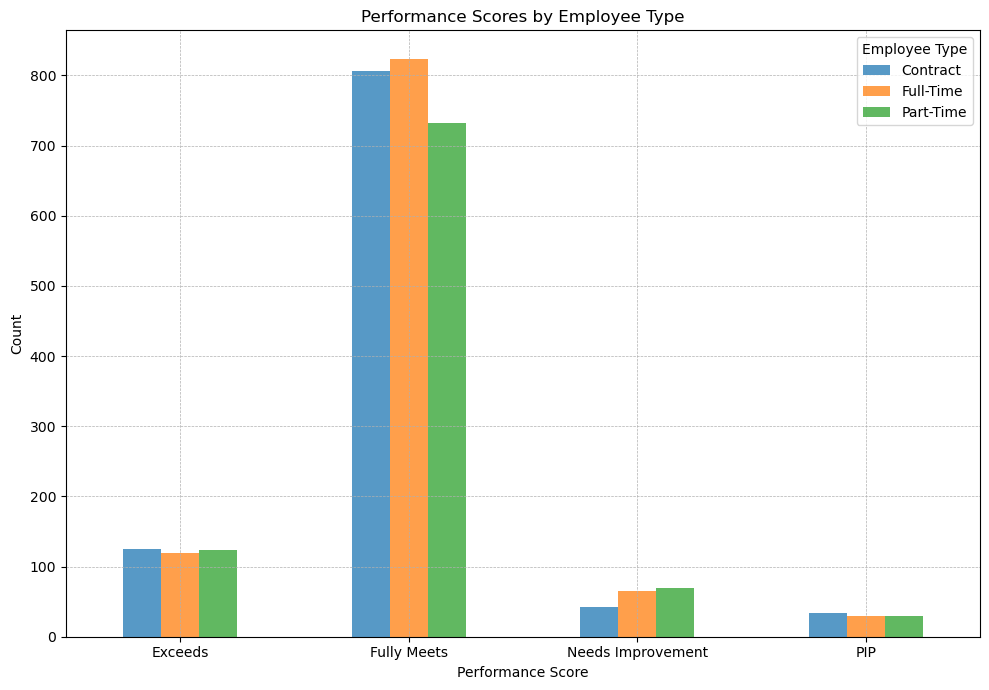

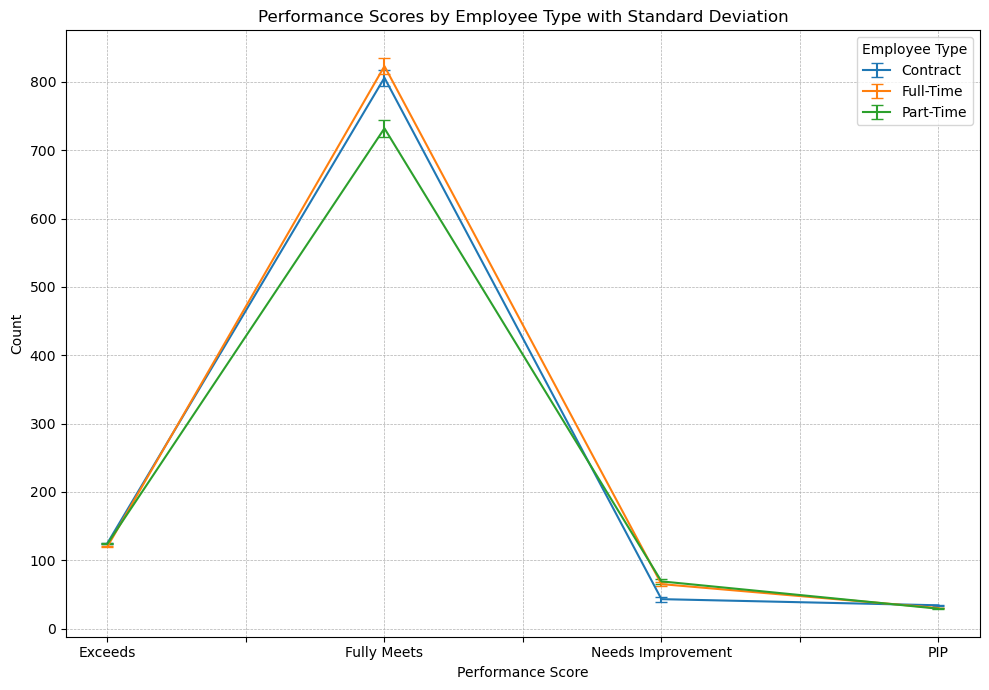

In [1]:

data = {
    'EmployeeType': ['Contract', 'Full-Time', 'Part-Time', 'Contract', 'Full-Time', 'Part-Time', 
                     'Contract', 'Full-Time', 'Part-Time', 'Contract', 'Full-Time', 'Part-Time'],
    'Performance Score': ['Exceeds', 'Exceeds', 'Exceeds', 'Fully Meets', 'Fully Meets', 'Fully Meets', 
                          'Needs Improvement', 'Needs Improvement', 'Needs Improvement', 'PIP', 'PIP', 'PIP'],
    'Count': [125, 120, 124, 806, 823, 732, 43, 65, 69, 34, 30, 29]
}
df = pd.DataFrame(data)


type_performance_stats = df.pivot_table(index='Performance Score', columns='EmployeeType', values='Count', fill_value=0)


fig, ax = plt.subplots(figsize=(10, 7))
type_performance_stats.plot(kind='bar', ax=ax, alpha=0.75, rot=0)
ax.set_title('Performance Scores by Employee Type')
ax.set_xlabel('Performance Score')
ax.set_ylabel('Count')
plt.legend(title='Employee Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

std_deviation = type_performance_stats.std(axis=1) / 4 
ax2 = type_performance_stats.plot(kind='line', yerr=std_deviation, capsize=4, figsize=(10, 7))
ax2.set_title('Performance Scores by Employee Type with Standard Deviation')
ax2.set_xlabel('Performance Score')
ax2.set_ylabel('Count')
plt.legend(title='Employee Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()
